**Definitaion:**  Survival analysis is a popular statistical method to investigate the expected duration of time until an event of interest occurs

it is also reffrerd as 

* Survival Time Analysis: Commonly used in the medical field, especially when studying the duration until a specific medical event or outcome.

* Reliability Analysis or Time-to-Failure Analysis: Frequently used in engineering, particularly when assessing the time it takes for a system or component to fail.

* Duration Analysis: Seen in economics, referring to the examination of the time it takes for an economic event or outcome to occur.


##### Following buisniess questions can be answered using survival analysis:

1. How long will a particular customer remain with your business? In other words, after how much time this customer will churn?
2. How long will this machine last, after successfully running for a year ?
3. What is the relative retention rate of different marketing channels?
4. What is the likelihood that a patient will survive, after being diagnosed?


##### Found this case study interesting.

https://www.youtube.com/watch?v=aKZQUaNHYb0

https://lifeat.tails.com/understanding-what-makes/


https://www.topbots.com/survival-analysis-with-python/

****In this notebook, I utilize the Employee Attrition & Performance dataset provided by IBM, accessible on Kaggle. The objective is to explore patterns in employee attrition rates and identify crucial employee characteristics for predicting the duration of employment for current employees.****

In [1]:
## Importing Libraries 

# !pip install lifelines

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import lifelines # for survival analysis
from sklearn.preprocessing import LabelEncoder
from lifelines.statistics import logrank_test

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv', sep=',')
print(f'Total_Data_Size :{df.shape}')
df.head()

Total_Data_Size :(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# List of categorical and numerical variables 

summary_categorical = []
for column in df.columns:
    if df[column].dtype == object:
        summary_categorical.append(column)
        print(df[column].value_counts())
        print(f"----------------------------------")

summary_numerical = []
for column in df.columns:
    if df[column].dtype != object:
        print(f"{column} : Minimum: {min((df[column].unique()))}, Maximum: {max((df[column].unique()))} ")
        summary_numerical.append(column)
        print(f"----------------------------------")

Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
H

**Survival Function**
T is when the event occurs and t is any point of time during the observation, survival S(t) is the probability of T greater than t. In other words, survival function is the probability of an individual will survive after time t.

    S(t) = Pr(T > t)
    
    
Some important characteristics of survival function:

1.T ≥ 0 and 0 < t < ∞
2.It is non-increasing
3.If t=0, then S(t)=1(survival probability is 1 at time 0)
4.If t=∞, then S(t)=0(survival probability goes to 0 as time goes to infinity  



**Hazard Function**

Hazard function or hazard rate, h(t), is the probability of an individual who has survived until time t and experiencing the event of interest at exactly at time t. Hazard function and survival function can be derived from each other by using the following formula.

    h(t) = -d/dt logS(t)


### Survival Function with  Kaplan-Meier Estimator (Non Parametric)

In [4]:
# Convert the Attrition into binary variable

encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])


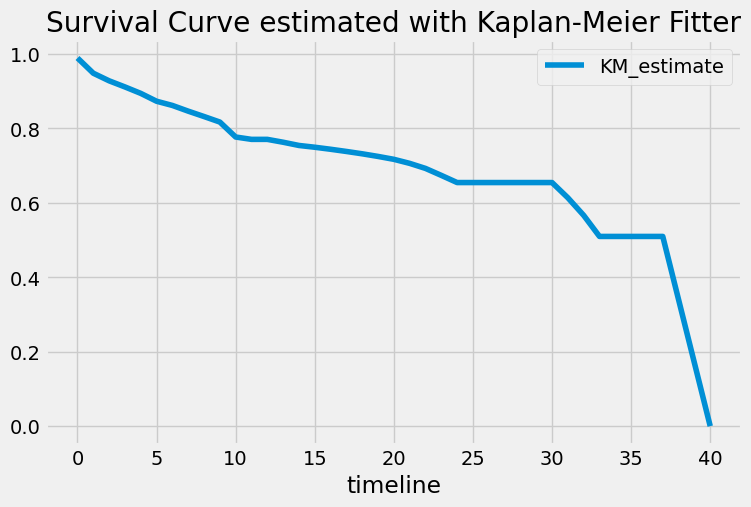

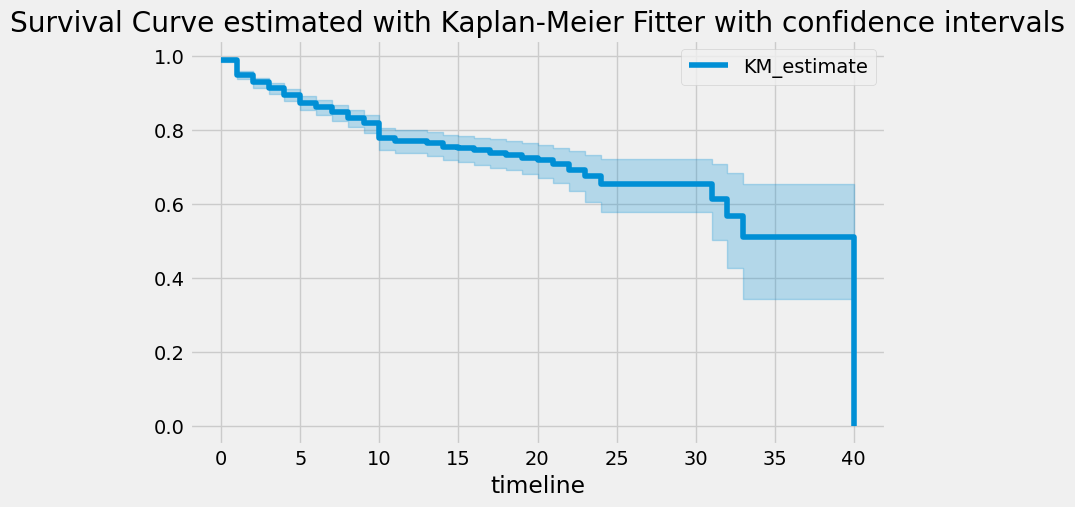

In [5]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df['YearsAtCompany'], event_observed=df['Attrition'])

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

In [6]:
# Print survival probabilities at each year
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.989116
1.0,0.948192
2.0,0.927792
3.0,0.911342
4.0,0.894026
5.0,0.872931
6.0,0.861611
7.0,0.846275
8.0,0.831850


**Observation**

We can see that probability of an individual survives longer than 2 years at the company is 92% however probability of surviving longer than 10 years is dropped to 77%.

### Survival Function of Different Groups  

**EnvironmentSatisfaction**

**WorkLifeBalance**

**Gender**

***will aggregate Low and Medium together under “Low Environmental Satisfaction” and High and Very High under “High Environmental Satisfaction”***

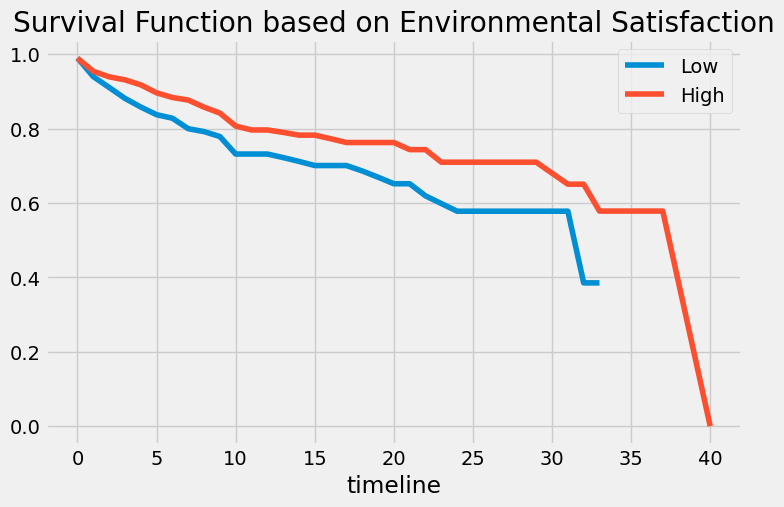

In [7]:
EnvironmentalLow = ((df['EnvironmentSatisfaction'] == 1) | (df['EnvironmentSatisfaction'] == 2))
EnvironmentalHigh = ((df['EnvironmentSatisfaction'] == 3) | (df['EnvironmentSatisfaction'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[EnvironmentalLow]['YearsAtCompany'], 
        event_observed=df[EnvironmentalLow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

low_prob = kmf.survival_function_

kmf.fit(durations=df[EnvironmentalHigh]['YearsAtCompany'], 
        event_observed=df[EnvironmentalHigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Environmental Satisfaction')
plt.show();

high_prob = kmf.survival_function_

In [8]:
low_prob

,Low
timeline,
0.0,0.989492
1.0,0.939391
2.0,0.910338
3.0,0.880904
4.0,0.857661
5.0,0.837119
6.0,0.827606
7.0,0.799432
8.0,0.791671


In [9]:
high_prob

,High
timeline,
0.0,0.988877
1.0,0.953762
2.0,0.938898
3.0,0.930792
4.0,0.917303
5.0,0.895855
6.0,0.883355
7.0,0.876435
8.0,0.857382


**Observation**:  As we can see individuals with high environmental satisfaction have higher survival probabilities than ones with low satisfaction.

***will aggregate 1 and 2 together under “Low WorkLife Balance” and 3 and 4 under “High WorkLife Balance ”***

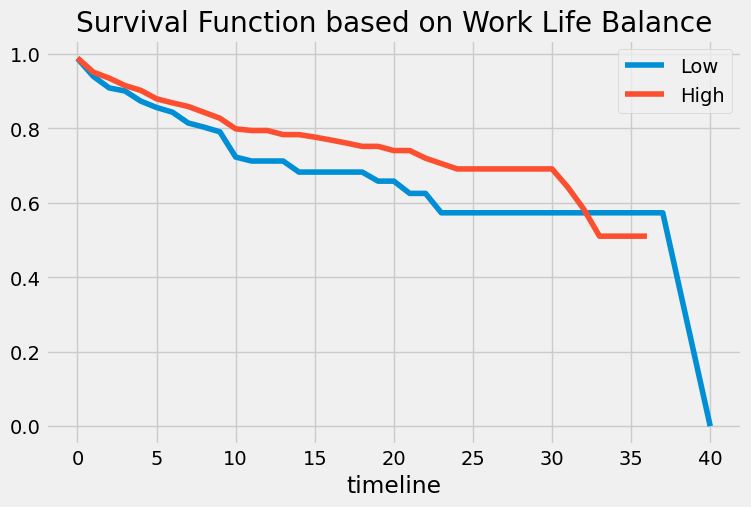

,High
timeline,
0.0,0.989484
1.0,0.951464
2.0,0.935446
3.0,0.915518
4.0,0.902495
5.0,0.879755
6.0,0.868983
7.0,0.859197
8.0,0.843452


In [10]:

worklifelow = ((df['WorkLifeBalance'] == 1) | (df['WorkLifeBalance'] == 2))
worklifehigh = ((df['WorkLifeBalance'] == 3) | (df['WorkLifeBalance'] == 4))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[worklifelow]['YearsAtCompany'], 
        event_observed=df[worklifelow]['Attrition'], 
        label='Low')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df[worklifehigh]['YearsAtCompany'], 
        event_observed=df[worklifehigh]['Attrition'], 
        label='High')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Work Life Balance')
plt.show();

kmf.survival_function_

**Observation**: In the Work-Life Balance plot above, we can see individuals with high work-life balance tend to stay longer at the company compared to ones with low work-life balance.

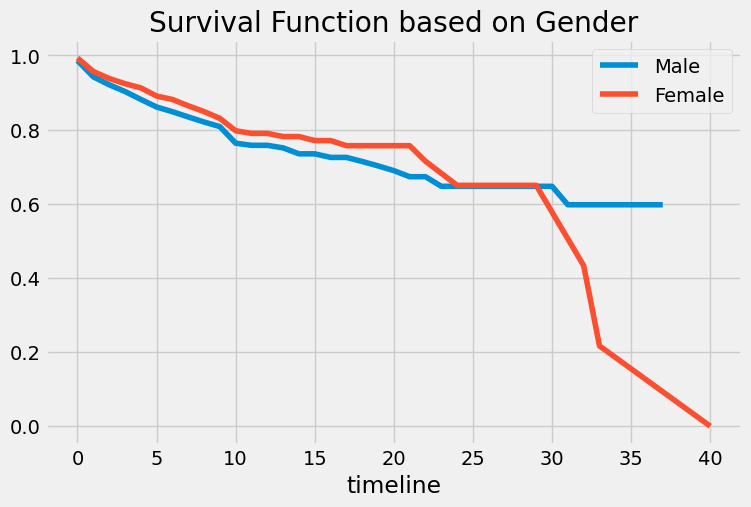

In [11]:
male = (df['Gender'] == 'Male')
female = (df['Gender'] == 'Female')

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df[male]['YearsAtCompany'], event_observed=df[male]['Attrition'], label='Male')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
kmf.fit(durations=df[female]['YearsAtCompany'], event_observed=df[female]['Attrition'], label='Female')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Gender')
plt.show();

However, in the Gender plot, male and female survival curves go almost head to head which makes it difficult to understand whether if there is a difference or not. To investigate this, we can run a **log-rank hypothesis test**.

Having null hypothesis indicating male and female survival curves are identical and alternative hypothesis indicating they are not identical. If the p-value of the log-rank test is lower than 0.05 we can reject the null hypothesis.

In [12]:
output = logrank_test(durations_A = df[male]['YearsAtCompany'],
                      durations_B = df[female]['YearsAtCompany'],
                      event_observed_A = df[male]['Attrition'],
                      event_observed_B = df[female]['Attrition'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.79 0.18      2.47>

p-value is greater than 0.05, we do not reject the null hypothesis. In other words, we do not reject the hypothesis of male and female survival curves are identical

In [13]:
output = logrank_test(durations_A = df[worklifelow]['YearsAtCompany'],
                      durations_B = df[worklifehigh]['YearsAtCompany'],
                      event_observed_A = df[worklifelow]['Attrition'],
                      event_observed_B = df[worklifehigh]['Attrition'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.40 0.04      4.80>

If we run the log-rank test for “work-life balance”; we find p-value is 0.04. It is lower than 0.05 so we reject the null hypothesis. In other words, we reject the hypothesis of survival curves of individuals with low work-life and high work-life balance are identical

If we had more than 2 groups (such as low, medium, high work-life balance) we could use **pairwise_lograng_test()** or **multivariate_logrank_test()**.

### Cox Proportional-Hazards Model

Cox-PH model is a regression model to discover the relationship between the survival time of individuals and predictor variable(s). It works with both categorical and numerical predictor variables. We will use Cox-PH model to not only investigate which are the factors that have high & low impact on survival but also to predict future survival probabilities of current employees

### Predicting Survival Time with Cox-PH Model

In [14]:
# Prepare the dataframe for fitting
columns_selected = ['Attrition',
                    'EnvironmentSatisfaction',
                    'JobInvolvement',
                    'JobLevel',
                    'JobSatisfaction',
                    'PercentSalaryHike',
                    'RelationshipSatisfaction',
                    'StockOptionLevel', 
                    'TrainingTimesLastYear', 
                    'YearsAtCompany',
                    ]
df = df[columns_selected]

In [15]:
from lifelines import CoxPHFitter 

coxph = CoxPHFitter()
coxph.fit(df, 
          duration_col='YearsAtCompany',
          event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [16]:
# Print model summary
coxph.print_summary()


<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1449.16
         time fit was run = 2024-01-12 22:11:21 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
EnvironmentSatisfaction   -0.24       0.79       0.06            -0.35            -0.12                 0.70                 0.89
JobInvolvement            -0.44       0.65       0.09            -0.61            -0.27                 0.55                 0.76
JobLevel                  -1.02       0.36       0.09            -1.20            -0.83                 0.30                 0.44
JobSatisfaction           -0.22       0.81       0.06            -0.33            -0.10                 0.72                 0.90
PercentSalaryHike         -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03
RelationshipSatisfaction  -0.08       0.92       0.06            -0.20             0.04                 0.82                 1.04
StockOptionLevel          -0.42       0.65       0.09            -0.60            -0.24                 0.55                 0.78
TrainingTimesLastYear     -0.17       0.85       0.05            -0.28            -0.06                 0.76                 0.94

                           cmp to      z      p   -log2(p)
covariate                                                 
EnvironmentSatisfaction      0.00  -4.00 <0.005      13.92
JobInvolvement               0.00  -5.08 <0.005      21.31
JobLevel                     0.00 -10.77 <0.005      87.49
JobSatisfaction              0.00  -3.77 <0.005      12.61
PercentSalaryHike            0.00  -0.44   0.66       0.60
RelationshipSatisfaction     0.00  -1.34   0.18       2.46
StockOptionLevel             0.00  -4.63 <0.005      18.04
TrainingTimesLastYear        0.00  -3.07 <0.005       8.84
---
Concordance = 0.79
Partial AIC = 2914.33
log-likelihood ratio test = 249.92 on 8 df
-log2(p) of ll-ratio test = 161.93

In model summary, exp(coef) is the hazard ratio which indicates how much the baseline hazard changes due to one-unit change in the corresponding factor. For example, if environmental satisfaction changes one unit:

hazards ratio: 0.79
hazards change: 0.79–1 = -0.21
survival time change: (1/0.79)-1 = 0.26 → 26% increase in survival time

Model summary also shows the significance of factor variables. Looking at p we can learn “Percent Salary Hike” and “Relationship Satisfaction” are not significant. We can also see this with the factor effects plot below.

<Axes: xlabel='log(HR) (95% CI)'>

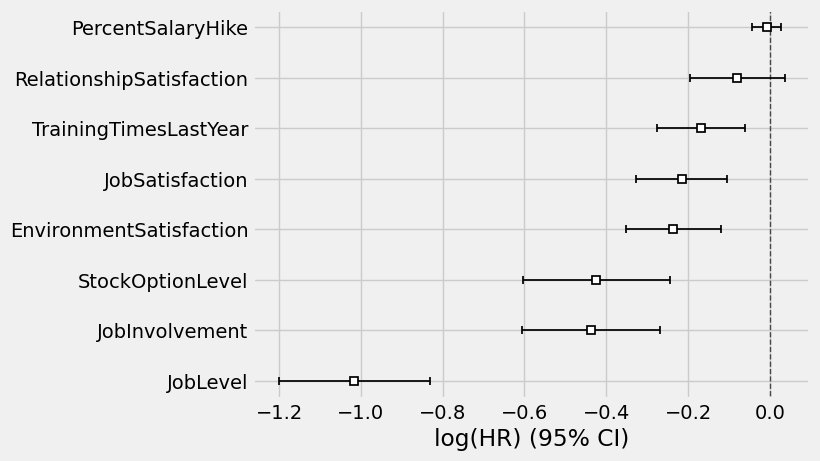

In [17]:
# Plot factor effects 
coxph.plot()

In [18]:

# Current employees
df_new = df.loc[df['Attrition'] == 0]

# Years at the company of current employees
df_new_obs = df_new['YearsAtCompany']

# Predict survival function for the employes still in the company
predictions = coxph.predict_survival_function(df_new, 
                              conditional_after=df_new_obs)
pd.DataFrame(predictions).head(11).iloc[:, :5]

,1,3,4,5,6
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.986432,0.954723,0.960284,0.962204,0.988253
2.0,0.986432,0.832633,0.916395,0.921246,0.978083
3.0,0.967805,0.809508,0.861182,0.810189,0.966473
4.0,0.945323,0.809508,0.827520,0.789045,0.951264
5.0,0.932830,0.778306,0.780170,0.789045,0.941632
6.0,0.915764,0.741487,0.733267,0.760458,0.927576
7.0,0.896696,0.721424,0.683692,0.726633,0.913012
8.0,0.873145,0.694475,0.556009,0.708160,0.896843
9.0,0.842240,0.664989,0.532844,0.683295,0.850746


Like other regression models, also Cox-PH model makes initial assumptions about data. To check if assumptions hold, we can use check_assumptions.

In [19]:
# Check the Cox-PH model assumptions
coxph.check_assumptions(df)

Proportional hazard assumption looks okay.


[]